# Proyecto 1 Etapa 2

Integrantes:

- Sergio Molano
- María Paula Tellez
- Santiago Hernández

## 1. Introducción

**Tema: Determinar la elegibilidad de un paciente para ensayos clínicos de cáncer a partir de
texto descriptivo**

El cáncer es una enfermedad con alta tasa de mortalidad que afecta a los seres humanos. Actualmente no existe una cura para este padecimiento, pero si algunos tratamientos paleativos. Sin embargo, el ser humano siempre está innovando, por lo tanto, se relizan muchos ensayos clínicos alrededor del mundo para encontrar la cura a esta enfermedad. Es importante mencionar que al desarrollar los ensayos clínicos de los posibles tratamientos se pierde demasiado tiempo encontrando los sujetos adecuados para realizar la prueba.


**Interés de negocio** 

A partir de un buen manejo de los datos brindados se puede llegar a identificar si un individuo es elegible para un ensayo clínico de cáncer a partir de un conjunto de palabras. Es importante mencionar que un modelo como este sería muy bueno para el desarrollo de la expectativa de vida humana, pues esta herramienta permitiría acelerar el desarrollo de los ensayos clínicos, lo que eventualmente se traduciría en encontrar pronto una cura a esta enfermedad que afecta a las personas. 

## 2. Carga de librerías

In [1]:
#importacion modulos
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB # classifier 

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    plot_confusion_matrix,
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#  modulos de procesamiento de texto
from nltk.tokenize import word_tokenize

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re 
for dependency in (
    "brown",
    "names",
    "wordnet",
    "averaged_perceptron_tagger",
    "universal_tagset",
):
    nltk.download(dependency)
    
import warnings
warnings.filterwarnings("ignore")
np.random.seed(123)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peluc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\peluc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\peluc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\peluc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\peluc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\peluc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


In [2]:
# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Modelado
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peluc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#importar librerias
import pandas as pd
import joblib

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

## 3. Perfilamiento y pre-procesamiento de los datos

* Exploración y Perfilamiento de Datos
    * Carga
    * Manipulación Básica
    * Visualización
    * Resumenes automáticos

### 2.1 Carga de los datos

In [4]:
#Se procede a realizar la carga de los datos
df_tracks = pd.read_csv("clinical_trials_on_cancer_data_clasificacion.csv", sep=',', encoding = 'utf-8')

# Perfilamiento

In [5]:
df_tracks.shape

(12000, 2)

In [6]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   label                12000 non-null  object
 1   study_and_condition  12000 non-null  object
dtypes: object(2)
memory usage: 187.6+ KB


Hay un total de 12000 filas y 2 columnas. De los datos no hay nulos en las columnas.Todas las columnas son de tipo objeto.

In [7]:
textos = df_tracks.copy()
textos['Conteo'] = [len(x) for x in textos['study_and_condition']]
textos.sample(4)

,label,study_and_condition,Conteo
3744,__label__1,study interventions are Albumin-Bound Paclitax...,132
10969,__label__1,study interventions are Albumin-Bound Paclitax...,150
10,__label__1,study interventions are Liposomal doxorubicin ...,129
1674,__label__0,study interventions are Albumin-Bound Paclitax...,112


En el fragmento anterior de puede apreciar un conteo de las variables para hacerse una idea del manejo de los datos.

In [8]:
textos["Conteo"].describe()

count    12000.000000
mean       173.782500
std         85.825052
min         42.000000
25%        117.000000
50%        152.000000
75%        205.250000
max       1080.000000
Name: Conteo, dtype: float64

In [9]:
display(df_tracks.sample(20))

,label,study_and_condition
1199,__label__0,study interventions are Doxorubicin . melanoma...
2037,__label__1,study interventions are Vidarabine . stage iii...
1485,__label__1,study interventions are Hormones . prostate ca...
1716,__label__0,study interventions are Alvocidib . stage iii ...
3398,__label__0,study interventions are Vaccines . breast canc...
9629,__label__1,"study interventions are Antibodies, Monoclonal..."
3165,__label__0,study interventions are Bevacizumab . recurren...
1336,__label__0,study interventions are Everolimus . gastrinom...
963,__label__1,study interventions are Cyclophosphamide . dif...
6102,__label__0,study interventions are Interleukin-2 . metast...


## 4. Preparación de los datos

A continuacion, se hace un tratamiento de los datos utilizando stopwords,}el paquete stop-words se utiliza para eliminar palabras vacías del texto en Python. el codigo siguiente eliminara todas las palabras vacias, palabras sin importancia para el analisis. 

In [10]:

stop_words =  stopwords.words('english')

def text_cleaning(text, remove_stop_words=True, lemmatize_words=True):
    # Clean the text, with the option to remove stop_words and to lemmatize word

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
        
    # Remove punctuation from text
   # text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer() 
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    
    # Return a list of words
    return(text)

Se crea una columna con los datos limpios.

In [11]:
#limpiar los datos
df_tracks["Limpiostudycondition"] = df_tracks["study_and_condition"].apply(text_cleaning)

In [12]:
df_tracks.head()

,label,study_and_condition,Limpiostudycondition
0,__label__0,study interventions are Saracatinib . recurren...,study intervention Saracatinib recurrent verru...
1,__label__1,study interventions are Stem cell transplantat...,study intervention Stem cell transplantation h...
2,__label__0,study interventions are Lenograstim . recurren...,study intervention Lenograstim recurrent adult...
3,__label__0,study interventions are Doxorubicin . stage ii...,study intervention Doxorubicin stage iii diffu...
4,__label__1,study interventions are Poly I-C . prostate ca...,study intervention Poly I C prostate cancer di...


Otro problema que tenemos es que, la columna label tiene ruido, lo cual impide el correcto funcionamiento del algoritmo, para esto, vamos a eliminar la parte __label__ y dejar únicamente los 1 y los 0 y posteriormente pasar la columna a ser tipo int.

In [13]:
df_tracks['label'] = df_tracks.label.str.split('__', expand = True)[2]

In [30]:
pd.options.display.max_colwidth=300

In [31]:
display(df_tracks.sample(10))

,label,study_and_condition,Limpiostudycondition
2052,1,study interventions are Cyclophosphamide . diffuse large cell lymphoma diagnosis and patients who did not conform to above criteria,study intervention Cyclophosphamide diffuse large cell lymphoma diagnosis patient conform criterion
4958,0,study interventions are Cyclophosphamide . lymphoma diagnosis and life expectancy,study intervention Cyclophosphamide lymphoma diagnosis life expectancy
814,1,study interventions are Fluorouracil . intestinal adenocarcinoma of the stomach diagnosis and patients who have any severe and or uncontrolled medical conditions or other conditions that could affect their participation in the study such as,study intervention Fluorouracil intestinal adenocarcinoma stomach diagnosis patient severe uncontrolled medical condition condition could affect participation study
2361,1,study interventions are Cyclosporine . unspecified childhood solid tumor protocol specific diagnosis and positive serology for toxoplasma_gondii on treatment or with evidence of active infection,study intervention Cyclosporine unspecified childhood solid tumor protocol specific diagnosis positive serology toxoplasma gondii treatment evidence active infection
11289,0,study interventions are Bevacizumab . neuroendocrine tumors diagnosis and doc uln alt and ast less_than doc uln,study intervention Bevacizumab neuroendocrine tumor diagnosis doc uln alt ast le doc uln
3839,1,"study interventions are Antibodies, Monoclonal . non hodgkin lymphomas diagnosis and positive serology for hepatitis hc defined as positive test for hcab in which case reflexively perform hc riba immunoblot assay on the same sample to confirm the result",study intervention Antibodies Monoclonal non hodgkin lymphoma diagnosis positive serology hepatitis hc defined positive test hcab case reflexively perform hc riba immunoblot assay sample confirm result
5475,1,study interventions are Dexamethasone acetate . primary central nervious system lymphoma diagnosis and malignancy treated with curative intent and with no evidence of active disease present for more than three years prior to screening and felt to be at low risk for recurrence by treating physician,study intervention Dexamethasone acetate primary central nervious system lymphoma diagnosis malignancy treated curative intent evidence active disease present three year prior screening felt low risk recurrence treating physician
11121,0,study interventions are Pentamidine . pancreatic cancer diagnosis and normal ecg,study intervention Pentamidine pancreatic cancer diagnosis normal ecg
9563,1,study interventions are Vidarabine . stage iii adult diffuse mixed cell lymphoma diagnosis and presence of circulating leukemic blasts in the peripheral blood detected by standard pathology for patients with aml all or cml,study intervention Vidarabine stage iii adult diffuse mixed cell lymphoma diagnosis presence circulating leukemic blast peripheral blood detected standard pathology patient aml cml
6717,0,study interventions are Cyclosporine . hematologic neoplasm diagnosis and fit to receive csf and give peripheral blood stem cells normal blood count normotensive no history of stroke,study intervention Cyclosporine hematologic neoplasm diagnosis fit receive csf give peripheral blood stem cell normal blood count normotensive history stroke


# Crear clasificador

En este paso se desarrollo el pipeline

In [18]:
#separar los datos de train data
X = df_tracks["Limpiostudycondition"]
y = df_tracks.label.values

In [19]:
# separar los datos en trining y test 

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42,
    shuffle=True,
    stratify=y,
)

Para la creacion del pipeline, se usaron los hiperparametros del mejor modelo obtenido en la entrega 1 del proyecto

In [20]:
# Creacion del pipeline
pipelineclassifier  = Pipeline(steps=[
                                 ('pre_processing',TfidfVectorizer(lowercase=False)),
                                 ('model', RandomForestClassifier(max_depth = 12,
                                     min_samples_leaf = 3,
                                     min_samples_split = 3,
                                     n_estimators = 200))
                                 ])

In [21]:
#entrenar el clasificador 
pipelineclassifier.fit(X_train,y_train)

Pipeline(steps=[('pre_processing', TfidfVectorizer(lowercase=False)),
                ('model',
                 RandomForestClassifier(max_depth=12, min_samples_leaf=3,
                                        min_samples_split=3,
                                        n_estimators=200))])

In [22]:
# Salcar el pipeline a un binary pickle file
joblib.dump(pipelineclassifier, 'rfc_pipeline.pkl')

['rfc_pipeline.pkl']

In [23]:
# Loading back in our serialized model
loaded_model = joblib.load('rfc_pipeline.pkl')

In [24]:
# Revisar los resultados predecidos  utilizando los datos de test
pipeline_preds = loaded_model.predict(X_train)

val_accuracy = accuracy_score(y_train, pipeline_preds)
val_roc_auc = roc_auc_score(y_train, pipeline_preds)
val_confusion_matrix = confusion_matrix(X_train, pipeline_preds)

print(f'Accuracy Score: {val_accuracy}')
print(f'ROC AUC Score: {val_roc_auc}')
print(f'Confusion Matrix: \n{val_confusion_matrix}')

Accuracy Score: 0.775
ROC AUC Score: 0.775
Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [35]:
# test model performance
prueba=["study intervention Cyclophosphamide diffuse large cell lymphoma diagnosis patient conform criterion","study intervention Cyclophosphamide lymphoma diagnosis life expectancy",]
y_prediccion = pipelineclassifier.predict(prueba)

In [36]:
print(y_prediccion)

['1' '0']


In [26]:
accuracy_score(y_test,y_prediccion)

0.7672222222222222

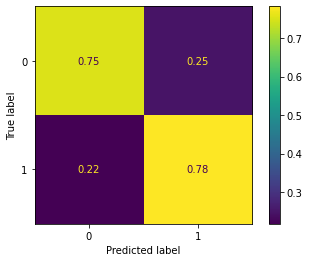

In [27]:
#matriz de confusion
plot_confusion_matrix(pipelineclassifier, X_test, y_test, normalize='true')

In [28]:
# revisar el reporte de clasificacion
print(classification_report(y_test, y_prediccion))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       900
           1       0.76      0.78      0.77       900

    accuracy                           0.77      1800
   macro avg       0.77      0.77      0.77      1800
weighted avg       0.77      0.77      0.77      1800



Salvar el modelo .joblib

In [29]:
joblib.dump(pipelineclassifier, 'modelRandomForest.joblib')

['modelRandomForest.joblib']